# Day 9 : Cost and Lost Function in Machine Learning

---
## Understanding Cost and Loss Functions
Cost and loss functions are fundamental concepts in machine learning, guiding models to optimize their performance by adjusting parameters. These functions measure the difference between predicted and actual values, helping models learn efficiently.

---
### Mean Squared Error (MSE)
MSE is widely used in regression problems and calculates the average squared difference between actual and predicted values:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- Penalizes larger errors more than smaller ones.
- Sensitive to outliers.
---

### Mean Absolute Error (MAE)
MAE calculates the average absolute difference between actual and predicted values:

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

- Treats all errors equally.
- Less sensitive to outliers than MSE.
---

### Cross-Entropy Loss
Used in classification problems, cross-entropy measures the difference between two probability distributions:

$$ H(p, q) = -\sum p(x) \log q(x) $$

- Penalizes incorrect class predictions.
- Works well for multi-class classification.
---

## Dataset and Implementation
We will:
1. **Generate a synthetic dataset** (for regression and classification tasks).
2. **Train machine learning models** using Scikit-Learn.
3. **Apply different loss functions** (MSE, MAE for regression; Cross-Entropy for classification).
4. **Visualize the loss over iterations** using 2D and 3D plots.
---

### Visualization
- **2D plots** to show the convergence of the loss function.
- **3D plots** to demonstrate the optimization process in multi-dimensional space.
---

## Next Steps
- Experiment with different learning rates to observe their impact on optimization.
- Compare loss functions across different model architectures.

```

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Generate synthetic dataset for regression
np.random.seed(42)
X = 2 * np.random.rand(100,1) -1
y = 3 * X**2 + 2 + np.random.randn(100,1) * 0.2

In [4]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
#Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [9]:
#Calculate loss Function
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

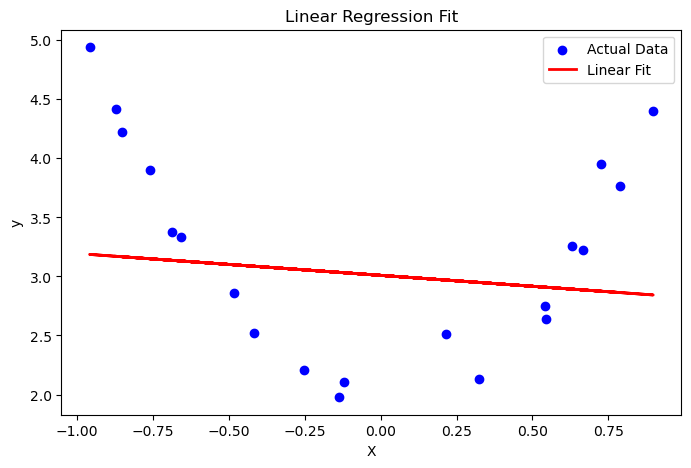

In [11]:
#Visualization of Regression Fit
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [12]:
#Generate synthetic dataset for classification
X_class = np.random.randn(200,2)
y_class =(X_class[:,0] + X_class[:, 1] > 0).astype(int)

In [13]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [14]:
#Train Logistic Regression Model
log_reg  = LogisticRegression()
log_reg.fit(X_train, y_train)
y_prob = log_reg.predict_proba(X_test)[:,1]

In [15]:
#Calculate Cross-Entropy Loss
cross_entropy = log_loss(y_test, y_prob)

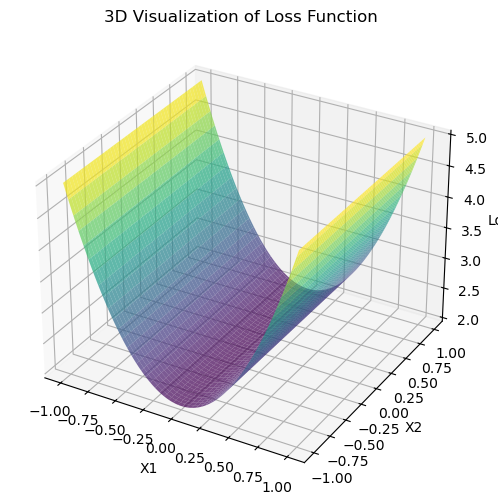

In [17]:
#3D Visualization of  Loss Landscape
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
X_range = np.linspace(-1, 1, 100)
Y_range = np.linspace(-1,1,100)
X_mesh, Y_mesh = np.meshgrid(X_range, Y_range)
Z_mesh = 3 * X_mesh**2 + 2
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis', alpha=0.7)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Loss')
ax.set_title('3D Visualization of Loss Function')
plt.show()

In [18]:
#Print Loss Results
print(f'Mean Square Error (MSE): {mse:.4f}')
print(f'Mean Absoulte Error (MAE): {mae: .4f}')
print(f'Cross-Entropy Loss: {cross_entropy: .4f}')

Mean Square Error (MSE): 0.7562
Mean Absoulte Error (MAE):  0.7418
Cross-Entropy Loss:  0.1433
